# Numerically Computing the Electric Field

## Reminders from previous Homeworks

One type of problem you will encounter in electrostatics is one where you know the distribution of charge at every point in space (or every point where the sources exist) and you need to determine the electric field everywhere in space (or everywhere you are interested). This can be done using Coulomb's law,

$$ \vec{E} = \int_V \dfrac{1}{4\pi\varepsilon_0}\dfrac{dq}{|\mathfrak{\vec{r}}|^2}\hat{\mathfrak{r}}$$

This calculation might be difficult to perform for all locations that you are interested in, or it might be downright impossible to solve analytical as no anti-derivative might exist for the function. In this case, using numerical techniques makes the problem tractable.

## The concept of numerical integration 

Typically, when you perform an integral analytically, you are seeking the anti-derivative of the function that you are integrating. This is one productive way to think about an integral. 

Another productive way to think about integration is adding up small bits. You might think about this when you do a line integral, but this can also be a productive way of thinking about any kind of integral, in particular, numerical integration. To conceptualize a numerical integral where you are trying to determine the electric field it is important to follow these steps:

1. Divide the source into chunks ($dq$) and pick a starting chunk
2. Determine the separation vector (Griffiths script-r, $\vec{\mathfrak{r}}$) between the chunk and the observation location
3. Compute the contribution to the total electric field from the chunk ($d\vec{E}$) - treating it as a point charge of size $dq$
4. Add this contribution to the "running" total of electric field
5. Repeat steps 2-5, which form the basis of numerical integration (it's the superposition of the chunks), until you have added up the contributions of all the chunks

## Purpose of this problem


In this problem, you will calculate and display the electric field of a line charge.

_For this problem, we will limit our calculations to two-dimensions as we are going to be graphing in a plane._

### Import the relevant libraries

We will begin by importing numpy and matplotlib, which allow us to do vector calculations and plotting. The "magic" at the end of these library imports ensures that the graphs will show up in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Computing the Electric Field of a line of charge

You might want to remind yourself how we can use array calculations with numpy. 

Consider a uniformly charged rod with total charge of 0.1 $\mu C$. It lies along the $x$-axis from -0.1 to 0.1 meters. We want to compute and represent the electric field of the charge at a distance of $0.01 m$ from the charge along the $y$-axis.

_Note: that we are still working in 2D as we will also graph this._

Below, we construct the line charge from an array of points (20 chunks of the line charge). We plot it as well.

In [2]:
## Length of rod (m)
L = 0.2

## Location of the ends of the rod (m)
lineStartX = -L/2
lineEndX = +L/2

## Number of chunks that the rod is cut up into
Nchunks = 20

## Create locations for the chunks that are equally spaces
xLocations = np.linspace(lineStartX+L/2/Nchunks,lineEndX-L/2/Nchunks,Nchunks)
print(xLocations)
yLocations = np.zeros(Nchunks)

## Stack the locations so that they are regular (x,y) ordered pairs
chunkLocations = np.stack((xLocations,yLocations), axis=1)

[-0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095]


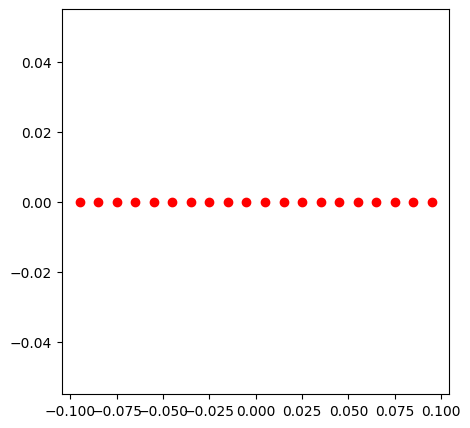

In [3]:
fig = plt.figure(figsize=(5,5))

## This for loop lets you do an operation on each chunk
for thisLocation in chunkLocations:
    
    plt.plot(thisLocation[0],thisLocation[1],'ro')

In [4]:
k = 9e9                           ## Electric constant in SI
Q = 0.1e-6                        ## Charge in C

chargeOfChunk = Q/Nchunks         ## Charge of a single chunk

### Problems to solve

Using numerical superposition, adding up the contributions to the electric field due to each chunk, you will solve the following problems.

1. We want to compute and represent the electric field of the charge at a distance of $0.01 m$ from the line charge along the $y$-axis. Do this.
2. The analytical formula for the electric field of the rod at that location is: $E_{rod} = \dfrac{1}{4\pi\varepsilon_0}\dfrac{Q}{y\sqrt{L^2/4+y^2}}$. Compare the value of the electric field at that location for different values of 'Nchunks', say for 10, 20, 50, and 100 chunks. How close do you get with 100 chunks? How many chunks do you need to get within 1% of the analytical solution?
3. Using what you have built to find the electric field at this location, find the electric field at a variety of points around the the line charge and represent them with arrows. You can choose the locations, but be systematic.

## Part 1: plot of electric field

In [5]:
Nchunks = 21
chargeOfChunk = Q/Nchunks

xLocations = np.linspace(lineStartX+L/2/Nchunks,lineEndX-L/2/Nchunks,Nchunks)
print(xLocations)
yLocations = np.zeros(Nchunks)
chunkLocations = np.stack((xLocations,yLocations), axis=1)

[-0.0952381  -0.08571429 -0.07619048 -0.06666667 -0.05714286 -0.04761905
 -0.03809524 -0.02857143 -0.01904762 -0.00952381  0.          0.00952381
  0.01904762  0.02857143  0.03809524  0.04761905  0.05714286  0.06666667
  0.07619048  0.08571429  0.0952381 ]


903893.0223746356
0.009334716629347636


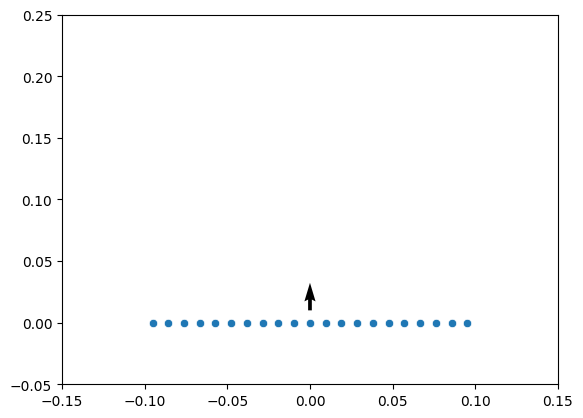

In [6]:
from numpy.linalg import norm
import seaborn as sns

E_tot = np.zeros(2)

for dq in chunkLocations:
    script_r = [0, 0.01] - dq
    E = k*chargeOfChunk*script_r/norm(script_r)**3
    E_tot += E

sns.scatterplot(x=chunkLocations[:,0], y=chunkLocations[:,1])
plt.quiver(0, 0.01, E_tot[0], E_tot[1])
plt.axis([-0.15, 0.15, -0.05, 0.25])

print(norm(E_tot))

error = abs((k*Q/(0.01*np.sqrt(0.01**2+L**2/4)) - norm(E_tot))/(k*Q/(0.01*np.sqrt(0.01**2+L**2/4))))
print(error)

# Part 2: rod formula

$$
E_{rod} = \frac{kQ}{y\sqrt{L^2/4+y^2}}= \frac{(9e9)(1e-7)}{0.01\sqrt{0.01^2+0.2^2/4}}
$$

In [7]:
k*Q/(0.01*np.sqrt(0.01**2+L**2/4))

895533.4711889903

Using the code above, it looks like we only need 21 chunks to get within 1% accuracy

## Part 3: Multiple observation points
Using some code from phy 415

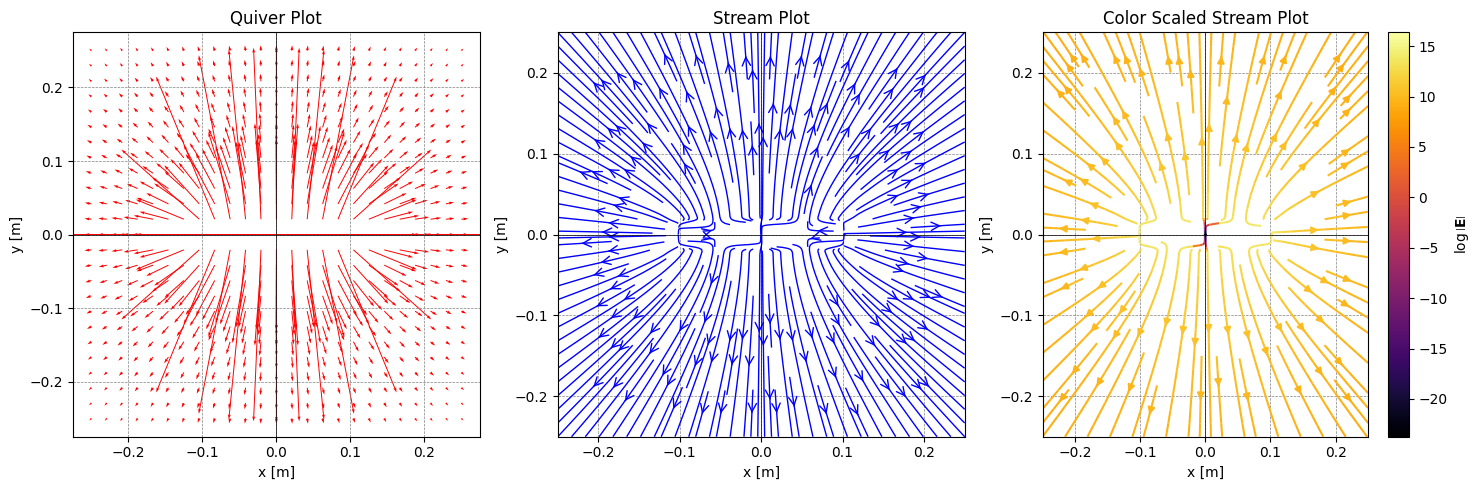

In [8]:
import matplotlib.cm as cm

def electric_field(charge, x_points, y_points, x_charge=0, y_charge=0):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            r_x = x_points[i, j] - x_charge
            r_y = y_points[i, j] - y_charge
            r_magnitude = np.sqrt(r_x**2 + r_y**2)
            if r_magnitude != 0:  # Avoid division by zero
                r_unit_x = r_x / r_magnitude
                r_unit_y = r_y / r_magnitude
                E_x[i, j] = k * charge * r_unit_x / r_magnitude**2
                E_y[i, j] = k * charge * r_unit_y / r_magnitude**2
    
    return E_x, E_y

def plot_electric_field(X, Y, E_x, E_y, stream_color='b'):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # First Subplot - Quiver Plot
    axs[0].quiver(X, Y, E_x, E_y, scale=1e6, color='r')
    axs[0].set_title('Quiver Plot')
    axs[0].set_xlabel('x [m]')
    axs[0].set_ylabel('y [m]')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Second Subplot - Stream Plot
    axs[1].streamplot(X, Y, E_x, E_y, color=stream_color, linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
    axs[1].set_title('Stream Plot')
    axs[1].set_xlabel('x [m]')
    axs[1].set_ylabel('y [m]')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Third Subplot - Color Scaled Quiver Plot
    magnitude = np.sqrt(E_x**2 + E_y**2)
    colors = np.log(magnitude)
    strm = axs[2].streamplot(X, Y, E_x, E_y, color=colors, cmap = cm.inferno)
    axs[2].set_title('Color Scaled Stream Plot')
    axs[2].set_xlabel('x [m]')
    axs[2].set_ylabel('y [m]')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    axs[2].grid(color='gray', linestyle='--', linewidth=0.5)
    # Add a colorbar to the plot
    cbar = plt.colorbar(strm.lines)
    cbar.set_label(r'$\log{\left|\mathbf{E}\right|}$')

    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

-0.15, 0.15, 

## Set Grid of Points
x = np.linspace(-0.25, 0.25, 25)
y = np.linspace(-0.25, 0.25, 25)
X, Y = np.meshgrid(x, y)

obsx = np.zeros([25, 25])
obsy = np.zeros([25, 25])
for chunk in chunkLocations:
    Ex, Ey = electric_field(chargeOfChunk, X, Y, chunk[0], chunk[1])
    obsx += Ex
    obsy += Ey

plot_electric_field(X, Y, obsx, obsy)